<a href="https://colab.research.google.com/github/MilanHassan/Python/blob/main/Visualisation/Finance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [74]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)



In [18]:
 startdate = dt.datetime(2006, 1, 1)
 enddate = dt.datetime(2016, 1, 1)

In [35]:
BAC = web.DataReader("BAC", "av-daily", start=startdate,
                 end=enddate,
                 api_key='ABC123')

C = web.DataReader("C", "av-daily", start=startdate,
                 end=enddate,
                 api_key='ABC123')

GS = web.DataReader("GS", "av-daily", start=startdate,
                 end=enddate,
                 api_key='ABC123')

JPM = web.DataReader("JPM", "av-daily", start=startdate,
                 end=enddate,
                 api_key='ABC123')

MS = web.DataReader("MS", "av-daily", start=startdate,
                 end=enddate,
                 api_key='ABC123')



In [33]:
WFC = web.DataReader("WFC", "av-daily", start=startdate,
                 end=enddate,
                 api_key='ABC123')

In [80]:
WFC.index

Index(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06', '2006-01-09',
       '2006-01-10', '2006-01-11', '2006-01-12', '2006-01-13', '2006-01-17',
       ...
       '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
       '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=2517)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [36]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [37]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys=tickers)

In [39]:
bank_stocks.head()

BAC                       ...    WFC                       
             open   high    low  close  ...   high    low  close   volume
2006-01-03  46.92  47.18  46.15  47.08  ...  63.95  62.39  63.80  5508200
2006-01-04  47.00  47.24  46.45  46.58  ...  63.64  62.73  63.06  5435000
2006-01-05  46.58  46.83  46.32  46.64  ...  63.11  62.62  62.99  5079000
2006-01-06  46.80  46.91  46.35  46.57  ...  63.55  62.77  63.36  4201900
2006-01-09  46.72  46.97  46.36  46.60  ...  63.65  63.11  63.35  2809800

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [40]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [41]:
bank_stocks.head()

Bank Ticker    BAC                       ...    WFC                       
Stock Info    open   high    low  close  ...   high    low  close   volume
2006-01-03   46.92  47.18  46.15  47.08  ...  63.95  62.39  63.80  5508200
2006-01-04   47.00  47.24  46.45  46.58  ...  63.64  62.73  63.06  5435000
2006-01-05   46.58  46.83  46.32  46.64  ...  63.11  62.62  62.99  5079000
2006-01-06   46.80  46.91  46.35  46.57  ...  63.55  62.77  63.36  4201900
2006-01-09   46.72  46.97  46.36  46.60  ...  63.65  63.11  63.35  2809800

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [53]:
bank_stocks.xs('close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [54]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [56]:
for tick in tickers: 
  returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()


In [58]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [73]:
returns.index

Index(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06', '2006-01-09',
       '2006-01-10', '2006-01-11', '2006-01-12', '2006-01-13', '2006-01-17',
       ...
       '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
       '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=2517)

In [83]:
returns.index = pd.to_datetime(returns.index)

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

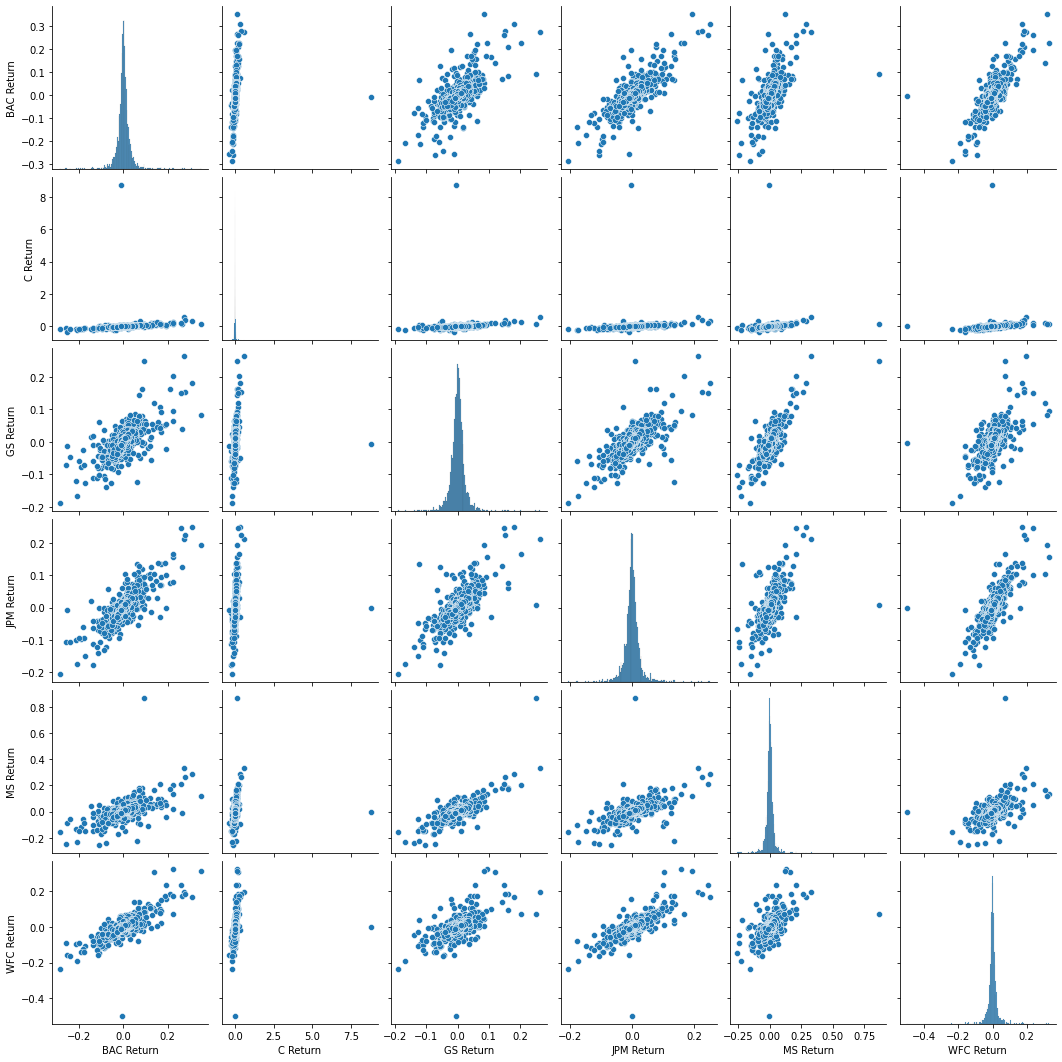

In [61]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [84]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

In [85]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [86]:
returns.std()

BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037821
WFC Return    0.031838
dtype: float64

In [91]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


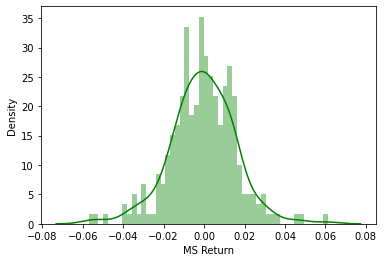

In [93]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


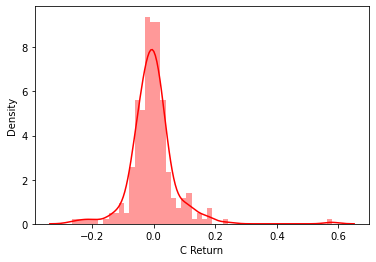

In [94]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

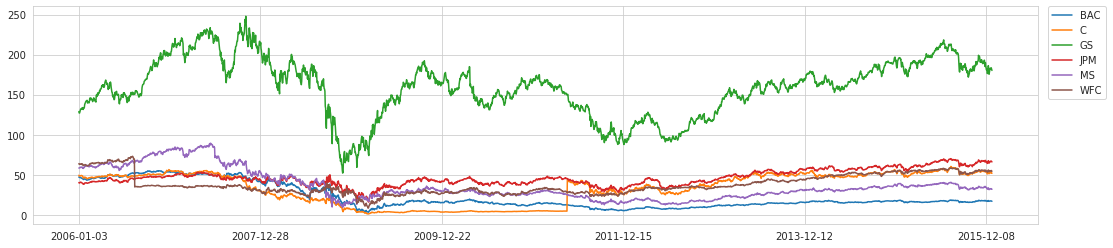

In [102]:
for tick in tickers: 
  bank_stocks[tick]['close'].plot(label=tick, figsize=(18,4))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

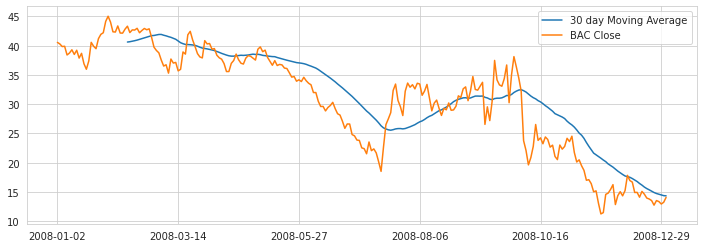

In [136]:
plt.figure(figsize=(12,4))
BAC['close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label = '30 day Moving Average')
BAC['close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

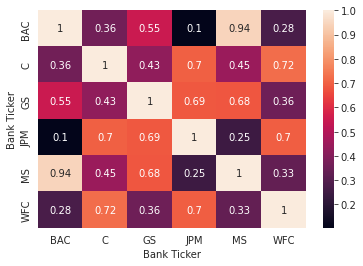

In [139]:
sns.heatmap(bank_stocks.xs('close', axis=1, level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

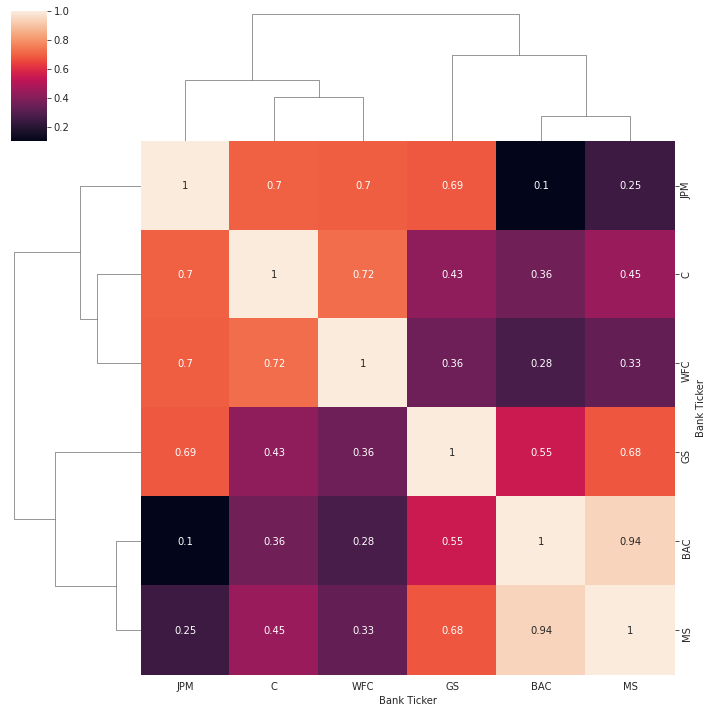

In [140]:
sns.clustermap(bank_stocks.xs('close', axis=1, level='Stock Info').corr(),annot=True)